# KNN

# MNIST

In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 获取数据集

In [3]:
# 获取数据集
>>> from sklearn.datasets import fetch_openml
>>> mnist = fetch_openml ('mnist_784', version = 1)
>>> mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Scikit-Learn加载的数据集通常具有类似的字典结构，包括：\
·DESCR键，描述数据集。\
·data键，包含一个数组，每个实例为一行，每个特征为一列。\
·target键，包含一个带有标记的数组。

In [4]:
# 提取特征 X 和标签 y
>>> X, y = mnist["data"], mnist["target"]
>>> X.shape

(70000, 784)

In [5]:
>>> y.shape

(70000,)

共有7万张图片，每张图片有784个特征。因为图片是28×28像素，
每个特征代表了一个像素点的强度，从0（白色）到255（黑色）。先来
看看数据集中的一个数字，你只需要随手抓取一个实例的特征向量，将
其重新形成一个28×28数组，然后使用Matplotlib的imshow（）函数将
其显示出来：

In [6]:
# 将 y 转为整数类型
y = y.astype(int)

# 检查前几个标签
print("前5个标签:", y[:5])  # [5 0 4 1 9]

前5个标签: 0    5
1    0
2    4
3    1
4    9
Name: class, dtype: int64


In [7]:
print(type(X))   

<class 'pandas.core.frame.DataFrame'>


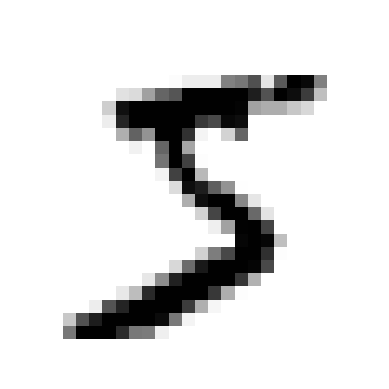

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[0] 
some_digit_image = some_digit.values.reshape(28, 28) 
# 这里本来应该写：
# some_digit = X[0]  # ✅ 正确：取第一个样本
# some_digit_image = some_digit.reshape(28, 28)
# 但是从type可知 X 被转成了DataFrame，所以要用。iloc来取位置
plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show()

## 划分训练集和测试集
事实上，MNIST数据集已经分成训练集（前6
万张图片）和测试集（最后1万张图片）了：

In [9]:
# 划分训练集和测试集（60k 训练，10k 测试）
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000, random_state=42, stratify=y
)

print("训练集大小:", X_train.shape[0])  # 60000
print("测试集大小:", X_test.shape[0])   # 10000

训练集大小: 60000
测试集大小: 10000


test_size=10000: 保留 1 万张做测试\
stratify=y: 保证训练/测试集中各类别比例一致（避免某类太少）

In [10]:
print("X_train shape:", X_train.shape)  # 应该是 (60000, 784)
print("X_test shape:", X_test.shape)    # 应该是 (10000, 784)
print("y_train shape:", y_train.shape)  # 应该是 (60000,)
print("y_test shape:", y_test.shape)    # 应该是 (10000,)

X_train shape: (60000, 784)
X_test shape: (10000, 784)
y_train shape: (60000,)
y_test shape: (10000,)


## 用sklearn 实现 KN


In [17]:
# 创建 KNN 分类器，K=3
knn_clf = KNeighborsClassifier(n_neighbors=3)

# 训练模型（其实只是把数据存起来）
knn_clf.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## 预测测试集

In [12]:
# 预测测试集标签
y_pred = knn_clf.predict(X_test)

## 计算准确度

In [13]:
acc = accuracy_score(y_test, y_pred)
print(f"准确率: {acc:.4f}")  # 大约 0.9688 → 96.88%

准确率: 0.9735


In [14]:
# 查看详细报告
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       986
           1       0.97      1.00      0.98      1125
           2       0.99      0.97      0.98       999
           3       0.97      0.97      0.97      1020
           4       0.98      0.96      0.97       975
           5       0.96      0.97      0.97       902
           6       0.98      0.99      0.98       982
           7       0.97      0.98      0.97      1042
           8       0.99      0.94      0.97       975
           9       0.95      0.96      0.96       994

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



解读： 

precision: 预测为某类的样本中，有多少是真的

recall: 实际是某类的样本中，有多少被正确预测

f1-score: 精确率和召回率的调和平均

###  混淆矩阵（Confusion Matrix）

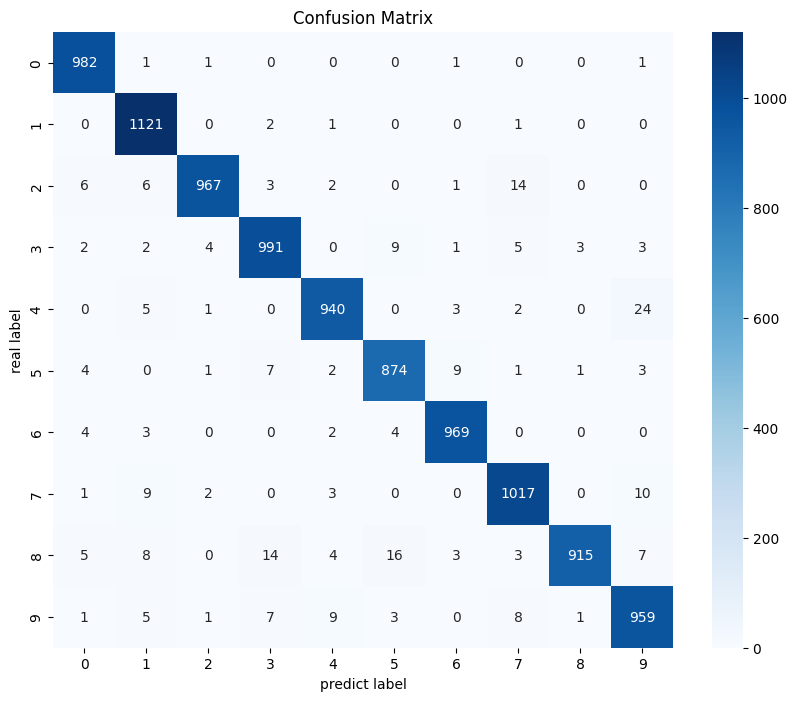

In [15]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("predict label")
plt.ylabel("real label")
plt.show()

解释这张图：

 1. 对角线上的数字 → 正确预测的数量

第 3 行第 3 列的 991：表示真实是“3”的图片，有 991 张被正确预测为“3”

第 4 行第 5 列的 24：表示真实是“4”的图片，有 24 张被错误预测为“5”


2. 非对角线上的数字 → 错误预测的数量

第4行第9列 = 24： 有 24 张真实是“4”的图片，被模型错判为“9”


## 调参-如何选择最佳k值

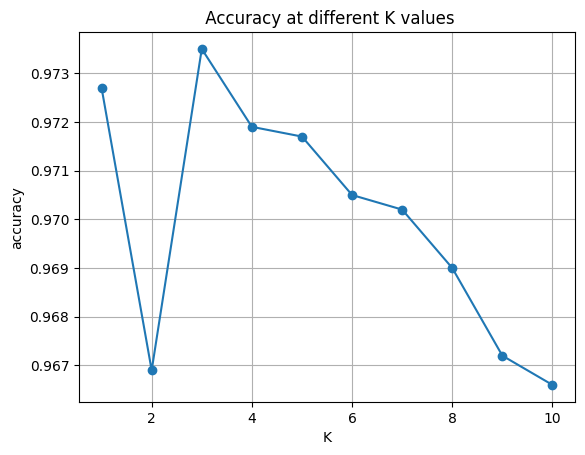

Best K values: 3


In [18]:
# 尝试不同的 K 值，找出最优
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# 画图
plt.plot(k_range, scores, marker='o')
plt.title(" Accuracy at different K values")
plt.xlabel("K")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

# 最佳 K
best_k = k_range[np.argmax(scores)]
print(f"Best K values: {best_k}")

📈 通常 K=3~7 表现最好。太小（K=1）容易受噪声影响；太大则过于平滑。 